In [1]:
!pip install torch torchvision torchaudio

In [2]:
import torchaudio
import torch
import json
import os
# import librosa
from scipy.io import wavfile
import random
import sklearn
random.seed(10)

In [3]:
mapping_vocab = {}

with open('phone_map','r') as file:
    for i in file:
        splits=i.split(':')
        mapping_vocab[splits[0].strip()]=splits[1].strip()
        
mapping_vocab['']='_'

In [4]:
mapping_vocab

{'sil': 'sil',
 'aa': 'aa',
 'ae': 'ae',
 'ah': 'ah',
 'ao': 'aa',
 'aw': 'aw',
 'ax': 'ah',
 'ax-h': 'ah',
 'axr': 'er',
 'ay': 'ay',
 'b': 'b',
 'bcl': 'sil',
 'ch': 'ch',
 'd': 'd',
 'dcl': 'sil',
 'dh': 'dh',
 'dx': 'dx',
 'eh': 'eh',
 'el': 'l',
 'em': 'm',
 'en': 'n',
 'eng': 'ng',
 'epi': 'sil',
 'er': 'er',
 'ey': 'ey',
 'f': 'f',
 'g': 'g',
 'gcl': 'sil',
 'h#': 'sil',
 'hh': 'hh',
 'hv': 'hh',
 'ih': 'ih',
 'ix': 'ih',
 'iy': 'iy',
 'jh': 'jh',
 'k': 'k',
 'kcl': 'sil',
 'l': 'l',
 'm': 'm',
 'ng': 'ng',
 'n': 'n',
 'nx': 'n',
 'ow': 'ow',
 'oy': 'oy',
 'p': 'p',
 'pau': 'sil',
 'pcl': 'sil',
 'q': '',
 'r': 'r',
 's': 's',
 'sh': 'sh',
 't': 't',
 'tcl': 'sil',
 'th': 'th',
 'uh': 'uh',
 'uw': 'uw',
 'ux': 'uw',
 'v': 'v',
 'w': 'w',
 'y': 'y',
 'z': 'z',
 'zh': 'sh',
 '': '_'}

In [5]:
# DATA_PREFIX = 'D:/SR_dataset/'

# with open('train.json') as f:

#     train_json = json.load(f)

# # for i in train_json: 
#     # print(i,train_json[i])
# for i in train_json:
#     splits = train_json[i]['wav'].split('/')
# #     print(splits)
#     split_index = splits.index('data')
#     splits = splits[split_index:]
#     new_file = DATA_PREFIX + '/'.join(splits)
#     train_json[i]['wav'] = new_file
#     print(train_json[i]['wav'])

In [6]:
str(torchaudio.get_audio_backend())

'soundfile'

In [7]:
# train_fbank_json={}

# import wave

# for i in train_json:
#     train_fbank_json[i]={}
#     location = train_json[i]['wav']
#     train_fbank_json[i]['spk_id']=train_json[i]['spk_id']
#     train_fbank_json[i]['duration']=train_json[i]['duration']
    
#     phns = train_json[i]['phn']
    
# #     print(phns)
# #     t=input()
#     phns = phns.split()
    
#     for j in range(len(phns)):
#         phns[j] = mapping_vocab[phns[j]]
#     phns = ' '.join(phns)
# #     print(phns)
# #     t=input()
#     train_fbank_json[i]['phn']=phns
#     splits = location.split('/')
#     split_index = splits.index('TRAIN')
#     splits2 = splits[split_index+1:-1]
#     new_location = DATA_PREFIX + 'data/fbank/train/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
# #     print(location)
# #     t=input()
#     waveform,sample_rate = torchaudio.load(location)
# #     t=input()
#     fbank = torchaudio.compliance.kaldi.fbank(waveform,sample_rate)
# #     print(fbank.shape)
# #     print(new_location+'/'+splits[-1]+'.pt')
# #     t=input()
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     train_fbank_json[i]['fbank'] = pt_loc
#     torch.save(fbank,pt_loc)

    
# with open('train_fbank.json', 'w') as outfile:
#     json.dump(train_fbank_json, outfile)    
    

    

In [8]:
# DATA_PREFIX = 'D:/SR_dataset/'

# with open('dev.json') as f:

#     dev_json = json.load(f)

# # for i in train_json: 
#     # print(i,train_json[i])
# for i in dev_json:
#     splits = dev_json[i]['wav'].split('/')
# #     print(splits)
#     split_index = splits.index('data')
#     splits = splits[split_index:]
#     new_file = DATA_PREFIX + '/'.join(splits)
#     dev_json[i]['wav'] = new_file
#     print(dev_json[i]['wav'])

In [9]:
# dev_json

In [10]:
# dev_fbank_json={}

# import wave

# for i in dev_json:
#     dev_fbank_json[i]={}
#     location = dev_json[i]['wav']
#     dev_fbank_json[i]['spk_id']=dev_json[i]['spk_id']
#     dev_fbank_json[i]['duration']=dev_json[i]['duration']

#     phns = dev_json[i]['phn']
    
# #     print(phns)
# #     t=input()
#     phns = phns.split()
    
#     for j in range(len(phns)):
#         phns[j] = mapping_vocab[phns[j]]
#     phns = ' '.join(phns)
# #     print(phns)
# #     t=input()
#     dev_fbank_json[i]['phn']=phns
    
#     splits = location.split('/')
#     split_index = splits.index('TEST')
#     splits2 = splits[split_index+1:-1]
#     new_location = DATA_PREFIX + 'data/fbank/dev/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
# #     print(location)
# #     t=input()
#     waveform,sample_rate = torchaudio.load(location)
# #     t=input()
#     fbank = torchaudio.compliance.kaldi.fbank(waveform,sample_rate)
# #     print(new_location+'/'+splits[-1]+'.pt')
# #     t=input()
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     dev_fbank_json[i]['fbank'] = pt_loc
#     torch.save(fbank,pt_loc)

    
# with open('dev_fbank.json', 'w') as outfile:
#     json.dump(dev_fbank_json, outfile)    
    

    

In [11]:

# DATA_PREFIX = 'D:/SR_dataset/'

# with open('test.json') as f:

#     test_json = json.load(f)

# # for i in train_json: 
#     # print(i,train_json[i])
# for i in test_json:
#     splits = test_json[i]['wav'].split('/')
# #     print(splits)
#     split_index = splits.index('data')
#     splits = splits[split_index:]
#     new_file = DATA_PREFIX + '/'.join(splits)
#     test_json[i]['wav'] = new_file
#     print(test_json[i]['wav'])



# test_fbank_json={}

# import wave

# for i in test_json:
#     test_fbank_json[i]={}
#     location = test_json[i]['wav']
#     test_fbank_json[i]['spk_id']=test_json[i]['spk_id']
#     test_fbank_json[i]['duration']=test_json[i]['duration']
#     phns = test_json[i]['phn']
    
# #     print(phns)
# #     t=input()
#     phns = phns.split()
    
#     for j in range(len(phns)):
#         phns[j] = mapping_vocab[phns[j]]
#     phns = ' '.join(phns)
# #     print(phns)
# #     t=input()
#     test_fbank_json[i]['phn']=phns
#     splits = location.split('/')
#     split_index = splits.index('TEST')
#     splits2 = splits[split_index+1:-1]
#     new_location = DATA_PREFIX + 'data/fbank/test/' + '/'.join(splits2)
#     os.makedirs(new_location,exist_ok=True)
# #     print(location)
# #     t=input()
#     waveform,sample_rate = torchaudio.load(location)
# #     t=input()
#     fbank = torchaudio.compliance.kaldi.fbank(waveform,sample_rate)
# #     print(fbank.shape)
# #     print(new_location+'/'+splits[-1]+'.pt')
# #     t=input()
#     pt_loc = new_location+'/'+splits[-1]+'.pt'
#     test_fbank_json[i]['fbank'] = pt_loc
#     torch.save(fbank,pt_loc)
    

# with open('test_fbank.json', 'w') as outfile:
#     json.dump(test_fbank_json, outfile)    
    


    

In [12]:

with open('train_fbank.json') as file:
    t_json = json.load(file)
    
t_json

{'FVFB0_SX312.WAV': {'spk_id': 'FVFB0',
  'duration': 3.79525,
  'phn': 'sil dh ah z ae n sil s er z l sil b ih s sil t r ey f aa r w er sil d ih f y uw sil th ih ng sil dh ah m sil th r uw sil k eh r f ah l ih f er s sil t sil',
  'fbank': 'D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX312.WAV.pt'},
 'FVFB0_SX222.WAV': {'spk_id': 'FVFB0',
  'duration': 2.5344375,
  'phn': 'sil y aa w ih z sil k ih m ah sil w ah th sil p ae th sil l aa sil jh ih sil k l ih sil g z ae m sil p l sil s sil',
  'fbank': 'D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX222.WAV.wav.pt'},
 'FVFB0_SX42.WAV': {'spk_id': 'FVFB0',
  'duration': 1.913625,
  'phn': 'sil b ih v l sil k l s sil k aa l er z aa r sil y uw hh ih s sh er iy sil',
  'fbank': 'D:/SR_dataset/data/fbank/train/DR1/FVFB0/SX42.WAV.pt'},
 'FVFB0_SI1032.WAV': {'spk_id': 'FVFB0',
  'duration': 2.8224375,
  'phn': 'sil ih w ih z ih s sil t aa r iy ah dh ah r ay n aa s r ih s f ay dx aa l ow v er ih sil g ae n sil',
  'fbank': 'D:/SR_dataset/data/fbank/trai

In [13]:

with open('test_fbank.json') as file:
    t_json = json.load(file)
    
t_json

{'MDAB0_SI1039.WAV': {'spk_id': 'MDAB0',
  'duration': 3.9424375,
  'phn': 'sil hh iy hh eh z n eh v er hh ih m s eh l f sil d ah n ey hh ih ng f ow w ih sil ch sil t ah sil b iy hh ey dx ih sil w ih sil ch ih v ah s hh ae z sil',
  'fbank': 'D:/SR_dataset/data/fbank/test/DR1/MDAB0/SI1039.WAV.pt'},
 'MDAB0_SI1669.WAV': {'spk_id': 'MDAB0',
  'duration': 2.0608125,
  'phn': 'sil b iy ih sil k s ay dx ih sil d ih n sil d ow n ah sil d eh n ah f ay er s eh l f sil',
  'fbank': 'D:/SR_dataset/data/fbank/test/DR1/MDAB0/SI1669.WAV.pt'},
 'MDAB0_SX49.WAV': {'spk_id': 'MDAB0',
  'duration': 2.201625,
  'phn': 'sil ae sil t sil w aa l ay sil t ah m ah sil t sil w eh l th sil d ey w l hh ae v sh ah sil b l iy sil',
  'fbank': 'D:/SR_dataset/data/fbank/test/DR1/MDAB0/SX49.WAV.wav.pt'},
 'MDAB0_SI2299.WAV': {'spk_id': 'MDAB0',
  'duration': 2.5984375,
  'phn': 'sil s ah m sil t ay m s iy sil k ow ah n s ay dx ah w ah th m ay f aa dh ih z sil b iy ng eh sil t hh ow m sil',
  'fbank': 'D:/SR_dataset/

In [14]:

with open('dev_fbank.json') as file:
    t_json = json.load(file)
    
t_json

{'MJSW0_SI1640.WAV': {'spk_id': 'MJSW0',
  'duration': 1.632,
  'phn': 'sil hh aw sil d ih sil w ah n sil jh oy n dh eh m sil',
  'fbank': 'D:/SR_dataset/data/fbank/dev/DR1/MJSW0/SI1640.WAV.pt'},
 'MJSW0_SX290.WAV': {'spk_id': 'MJSW0',
  'duration': 3.609625,
  'phn': 'sil dh ih s sil b r ow sh er ih z sil p er sil t ih sil k ih l iy ih n f aa r m ih sil t ih v f er sil p er s sil p eh sil t ih v sil b ay er sil',
  'fbank': 'D:/SR_dataset/data/fbank/dev/DR1/MJSW0/SX290.WAV.pt'},
 'MJSW0_SX20.WAV': {'spk_id': 'MJSW0',
  'duration': 3.53925,
  'phn': 'sil sh iy w aa r w aa r m f l iy s iy w uh l eh n ow v er aa l z sil',
  'fbank': 'D:/SR_dataset/data/fbank/dev/DR1/MJSW0/SX20.WAV.pt'},
 'MJSW0_SX200.WAV': {'spk_id': 'MJSW0',
  'duration': 2.5344375,
  'phn': 'sil r ae l f sil k ih n sil t r ow l dh ah s sil t aa sil w aa sil ch f r ah m ah sil b l iy sil ch er s sil',
  'fbank': 'D:/SR_dataset/data/fbank/dev/DR1/MJSW0/SX200.WAV.pt'},
 'MJSW0_SX380.WAV': {'spk_id': 'MJSW0',
  'duration':

# Features

## Use `dataloader` to get an utterance

In [15]:
from dataloader import get_dataloader
import torch
import numpy as np

In [16]:
loader = get_dataloader('train_fbank.json', 1, False)
data_iter = iter(loader)

In [17]:
fbank, lens, trans, dur = next(data_iter)

In [18]:
print('The utterance has {} seconds.'.format(dur[0]))
print('Filter bank feature has {} frames and {} dimensions.'.format(
    fbank.shape[0], fbank.shape[2]))
print('The correspoinding transcription is: {}.'.format(trans[0]))

The utterance has 3.79525 seconds.
Filter bank feature has 378 frames and 23 dimensions.
The correspoinding transcription is: sil dh ah z ae n sil s er z l sil b ih s sil t r ey f aa r w er sil d ih f y uw sil th ih ng sil dh ah m sil th r uw sil k eh r f ah l ih f er s sil t sil.


## Plot FBANK

<Figure size 432x288 with 0 Axes>

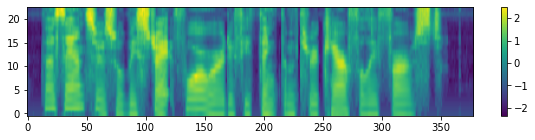

In [19]:
import matplotlib.pyplot as plt
import numpy as np

feature = np.transpose(fbank[:, 0, :].numpy())
plt.clf()
plt.figure(figsize=(10,2))
plt.imshow(feature, aspect='auto', origin='lower')
plt.colorbar()
plt.show()

# CTC model for ASR

## Obtain phoneme output units

In [20]:
# First find the unique phones in train.json, and then
# create a file named vocab.txt, each line in this 
# file is a unique phone, in total there should be 
# 40 lines

vocab = {}
phonemes = []
with open("vocab_39.txt") as f:
    for id, text in enumerate(f):
        vocab[text.strip()] = id
        phonemes.append(text)
phonemes = phonemes[1:]

In [21]:
vocab

{'_': 0,
 'aa': 1,
 'ae': 2,
 'ah': 3,
 'aw': 4,
 'ay': 5,
 'b': 6,
 'ch': 7,
 'd': 8,
 'dh': 9,
 'dx': 10,
 'eh': 11,
 'er': 12,
 'ey': 13,
 'f': 14,
 'g': 15,
 'hh': 16,
 'ih': 17,
 'iy': 18,
 'jh': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'ng': 24,
 'ow': 25,
 'oy': 26,
 'p': 27,
 'r': 28,
 's': 29,
 'sh': 30,
 'sil': 31,
 't': 32,
 'th': 33,
 'uh': 34,
 'uw': 35,
 'v': 36,
 'w': 37,
 'y': 38,
 'z': 39}

In [22]:
# # Count the number of times each phone appear in the training set
# # and save the numbers correcponding to each phone in vocab.txt 
# # into counts.txt

# counts = []
# with open("counts.txt") as f:
#     for i in f:
#         counts.append(int(i))

## Plot frequencies of graphemes

In [23]:
# plt.clf()
# plt.figure(figsize=(10,2))
# freq = np.array(counts) / np.sum(counts) * 100
# plt.bar(phonemes, freq)
# plt.show()

## Model & training configurations

In [24]:
from collections import namedtuple
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

args = {'seed': 123,
        'train_json': 'train_fbank.json',
        'val_json': 'dev_fbank.json',
        'test_json': 'test_fbank.json',
        'batch_size': 4,
        'num_layers': 1,
        'fbank_dims': 23,
        'model_dims': 128,
        'concat': 1,
        'lr': 0.5,
        'vocab': vocab,
        'report_interval': 50,
        'num_epochs': 25,
        'device': device,
        'clip':0.5,
       }

args = namedtuple('x', args)(**args)

In [25]:
import models_regularized
model = models_regularized.BiLSTM(
    args.num_layers, args.fbank_dims * args.concat, args.model_dims, len(args.vocab))
num_params = sum(p.numel() for p in model.parameters())
print('Total number of model parameters is {}'.format(num_params))

Total number of model parameters is 166952


## Training

In [26]:
# from datetime import datetime
# from trainer_SGD_Optim import train
# start = datetime.now()
# model.to(args.device)
# model_path,history = train(model, args)
# end = datetime.now()
# duration = (end - start).total_seconds()
# print('Training finished in {} minutes.'.format(divmod(duration, 60)[0]))
# print('Model saved to {}'.format(model_path))

In [27]:
# import matplotlib.pyplot as plt
# temp = [1]*len(history['loss'])
# plt.plot(history['loss'],label='Training Loss')
# plt.plot(history['val_loss'],label='Val Loss')
# plt.plot(temp,'--')
# plt.legend()
# plt.show()

## Decoding

In [28]:
### You can uncomment the following line and change model path to the model you want to decode
model_path="checkpoints/20230123_003821/model_22"

In [29]:
import torch
model.to(args.device)

print('Loading model from {}'.format(model_path))
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

Loading model from checkpoints/20230123_003821/model_22


BiLSTM(
  (lstm): LSTM(23, 128, bidirectional=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (proj): Linear(in_features=256, out_features=40, bias=True)
)

(17.572640066731545, 7.660225218962881, 4.4626720422633115, 74.76713471430557, 29.695537327957737)
SUB: 17.57%, DEL: 7.66%, INS: 4.46%, COR: 74.77%, PER: 29.70%
0.37


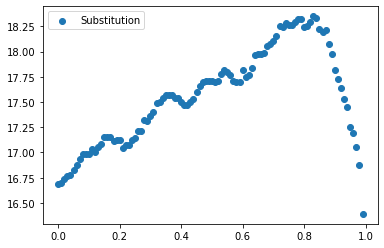

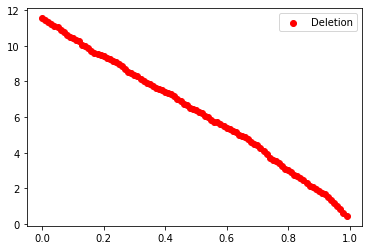

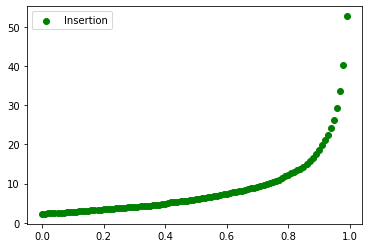

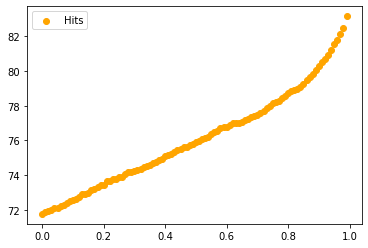

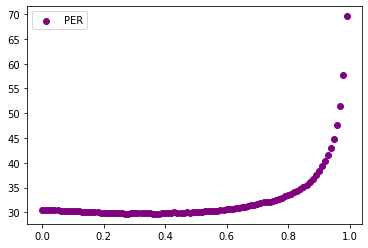

In [42]:
from decoder_penalty import decode
factors = np.arange(0,1,0.01)
DEL=[]
SUB=[]
INS=[]
COR=[]
PER=[]
best_result=None
best_f =0
min_per=float('inf')
for f in factors:
    results = decode(model, args, args.test_json,factor=f)
    if results[4]<min_per:
        best_result=results
        min_per=results[4]
        best_f  = f
    SUB.append(results[0])
    DEL.append(results[1])
    INS.append(results[2])
    COR.append(results[3])
    PER.append(results[4])
    
print(best_result)
print("SUB: {:.2f}%, DEL: {:.2f}%, INS: {:.2f}%, COR: {:.2f}%, PER: {:.2f}%".format(*best_result))
print(best_f)
x=factors
plt.scatter(x,SUB,label='Substitution')
plt.legend()
plt.show()

plt.scatter(x,DEL,label='Deletion',color='red')
plt.legend()
plt.show()
plt.scatter(x,INS,label='Insertion',color='green')
plt.legend()
plt.show()
plt.scatter(x,COR,label='Hits',color='orange')
plt.legend()
plt.show()
plt.scatter(x,PER,label='PER',color='purple')
plt.legend()
plt.show()


In [43]:
from decoder_no_penalty import decode2
results2 = decode2(model, args, args.test_json)
print(results2)
print("SUB: {:.2f}%, DEL: {:.2f}%, INS: {:.2f}%, COR: {:.2f}%, PER: {:.2f}%".format(*results2))

(16.6828861393021, 11.552898651466704, 2.2660920339218684, 71.7642152092312, 30.501876824690672)
SUB: 16.68%, DEL: 11.55%, INS: 2.27%, COR: 71.76%, PER: 30.50%


In [44]:
from dataloader import get_dataloader

new_loader = get_dataloader('test_fbank.json',1,True)

In [45]:
data_iter = iter(new_loader)
fbank, lens, trans, dur = next(data_iter)

print(lens,trans,dur)




tensor([309]) ['sil dh eh sil d ay ih sil g r ae m ey sil k s eh n s sil ow n l iy sil ae f sil t er m ah sil sh sil t ah dx iy sil'] [3.1104375]


In [46]:
from utils import concat_inputs


inputs, in_lens = concat_inputs(fbank, lens, factor=1)

In [47]:
from torch.nn.functional import log_softmax


In [48]:
inputs=inputs.to(device)
# outputs = log_softmax(model(inputs), dim=-1)
# inputs, in_lens = concat_inputs(inputs, in_lens, factor=args.concat)
idx2grapheme = {y: x for x, y in vocab.items()}

with torch.no_grad():
    outputs = torch.nn.functional.softmax(model(inputs), dim=-1)
#     outputs = torch.argmax(outputs, dim=-1).transpose(0, 1)
# outputs = [[idx2grapheme[i] for i in j] for j in outputs.tolist()]
# outputs = [[v for i, v in enumerate(j) if i == 0 or v != j[i - 1]] for j in outputs]
# outputs = [list(filter(lambda elem: elem != "_", i)) for i in outputs]
# outputs = [" ".join(i) for i in outputs]

In [49]:
outputs.shape

torch.Size([309, 1, 40])

In [50]:
vocab_reverse_mapping = {vocab[idx]:idx for idx in vocab}

In [51]:
vocab_reverse_mapping

{0: '_',
 1: 'aa',
 2: 'ae',
 3: 'ah',
 4: 'aw',
 5: 'ay',
 6: 'b',
 7: 'ch',
 8: 'd',
 9: 'dh',
 10: 'dx',
 11: 'eh',
 12: 'er',
 13: 'ey',
 14: 'f',
 15: 'g',
 16: 'hh',
 17: 'ih',
 18: 'iy',
 19: 'jh',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'ng',
 25: 'ow',
 26: 'oy',
 27: 'p',
 28: 'r',
 29: 's',
 30: 'sh',
 31: 'sil',
 32: 't',
 33: 'th',
 34: 'uh',
 35: 'uw',
 36: 'v',
 37: 'w',
 38: 'y',
 39: 'z'}

In [52]:
df = []


for i in range(len(outputs[:50])):
    for j in range(len(outputs[0][0])):
        df.append({'frame':i,'word':vocab_reverse_mapping[j],'value':outputs[i][0][j].item()})

In [53]:
print(df)

[{'frame': 0, 'word': '_', 'value': 0.9999655485153198}, {'frame': 0, 'word': 'aa', 'value': 1.4427740779865417e-07}, {'frame': 0, 'word': 'ae', 'value': 4.3746871369876317e-07}, {'frame': 0, 'word': 'ah', 'value': 8.054830686887726e-06}, {'frame': 0, 'word': 'aw', 'value': 1.9057409872402786e-07}, {'frame': 0, 'word': 'ay', 'value': 1.240230034227352e-07}, {'frame': 0, 'word': 'b', 'value': 5.44079403752562e-09}, {'frame': 0, 'word': 'ch', 'value': 1.1738348959511313e-08}, {'frame': 0, 'word': 'd', 'value': 1.3385422903411381e-07}, {'frame': 0, 'word': 'dh', 'value': 1.064079015122843e-06}, {'frame': 0, 'word': 'dx', 'value': 1.5048877344270295e-07}, {'frame': 0, 'word': 'eh', 'value': 1.321219997407752e-06}, {'frame': 0, 'word': 'er', 'value': 4.2629761765056173e-07}, {'frame': 0, 'word': 'ey', 'value': 2.2871924443279568e-07}, {'frame': 0, 'word': 'f', 'value': 4.820299750463164e-07}, {'frame': 0, 'word': 'g', 'value': 7.947337898883688e-09}, {'frame': 0, 'word': 'hh', 'value': 8.30

In [54]:
import pandas as pd

df = pd.DataFrame(df)
df.reset_index(drop=True)

,frame,word,value
0,0,_,9.999655e-01
1,0,aa,1.442774e-07
2,0,ae,4.374687e-07
3,0,ah,8.054831e-06
4,0,aw,1.905741e-07
...,...,...,...
1995,49,uw,5.045052e-07
1996,49,v,2.202544e-06
1997,49,w,6.929433e-06
1998,49,y,1.771213e-05


In [55]:
heatmap_pt = pd.pivot_table(df,values ='value', index=['word'], columns='frame')


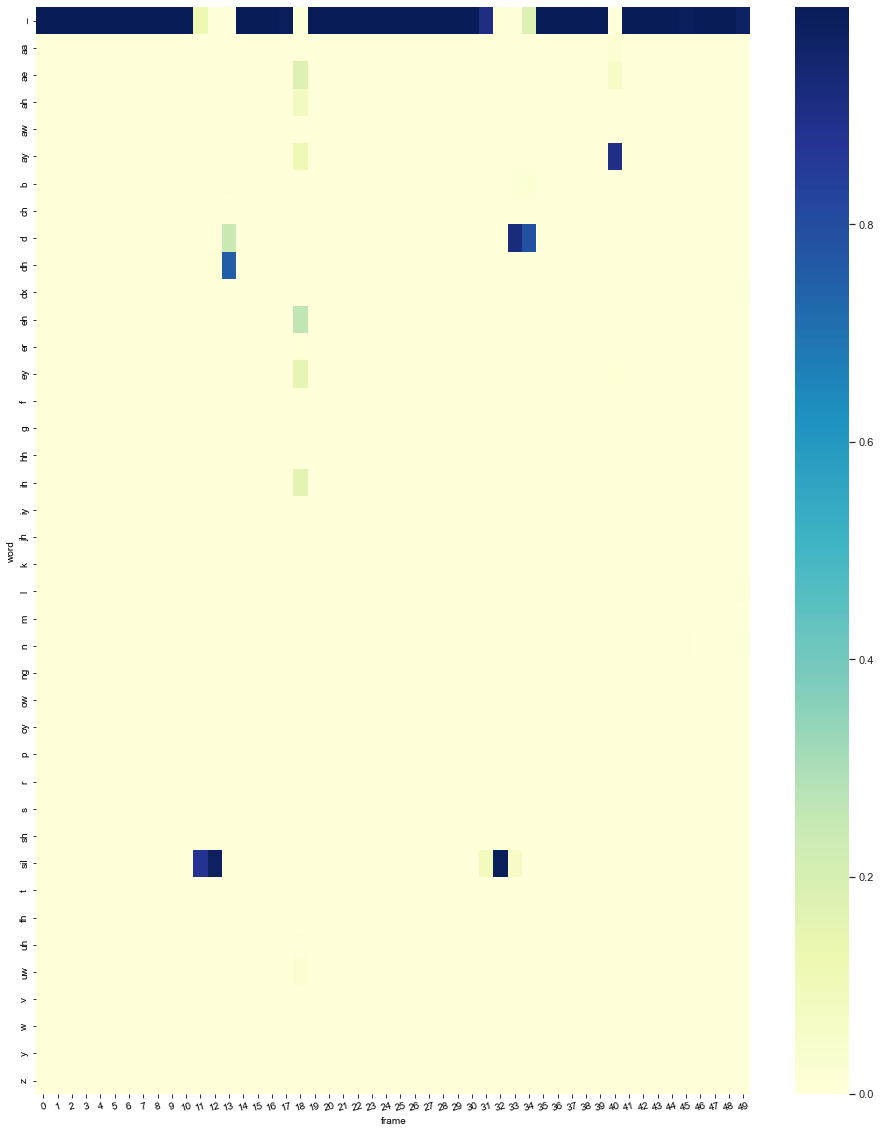

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import random

fig, ax = plt.subplots(figsize=(16,20))
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=15)



plt.show()

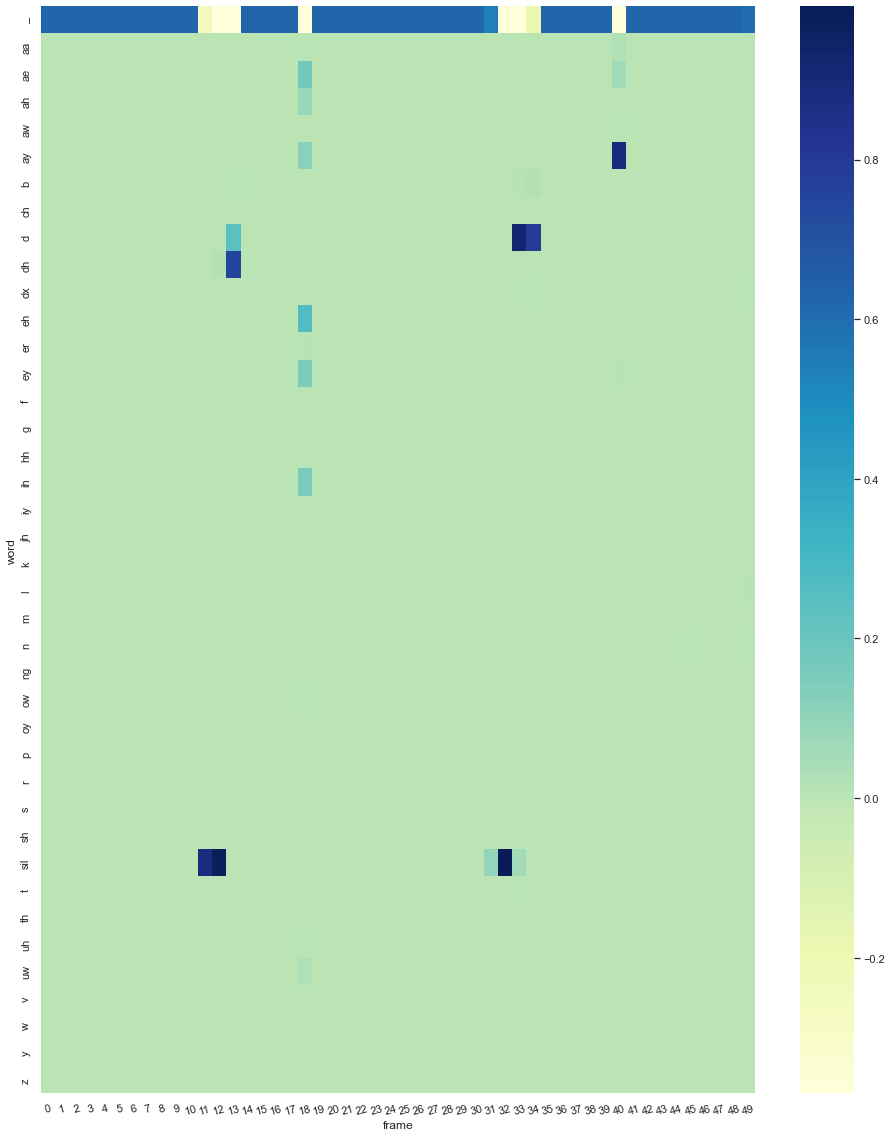

In [57]:
inputs=inputs.to(device)
idx2grapheme = {y: x for x, y in vocab.items()}

with torch.no_grad():
    outputs = torch.nn.functional.softmax(model(inputs), dim=-1)
#     outputs = torch.argmax(outputs, dim=-1).transpose(0, 1)

df = []


for i in range(len(outputs[:50])):
    for j in range(len(outputs[0][0])):
        if j!=0:
            df.append({'frame':i,'word':vocab_reverse_mapping[j],'value':outputs[i][0][j].item()})
        else:
            df.append({'frame':i,'word':vocab_reverse_mapping[j],'value':outputs[i][0][j].item()-0.37})
            
import pandas as pd

df = pd.DataFrame(df)
df.reset_index(drop=True)
heatmap_pt = pd.pivot_table(df,values ='value', index=['word'], columns='frame')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import random

fig, ax = plt.subplots(figsize=(16,20))
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

In [58]:
trans
from datetime import datetime
from pathlib import Path

import torch
from torch.nn import CTCLoss
from torch.nn.utils.rnn import pad_sequence
from torch.nn.functional import log_softmax
from torch.optim import SGD
from decoder import decode
from utils import concat_inputs
from models import BiLSTM
from dataloader import get_dataloader
from collections import namedtuple,defaultdict



In [59]:
targets = [torch.tensor(list(map(lambda x: vocab[x], target.split())),
                                    dtype=torch.long)
                       for target in trans]
out_lens = torch.tensor(
    [len(target) for target in targets], dtype=torch.long)
targets = pad_sequence(targets, batch_first=True)

In [60]:
targets.shape

torch.Size([1, 40])